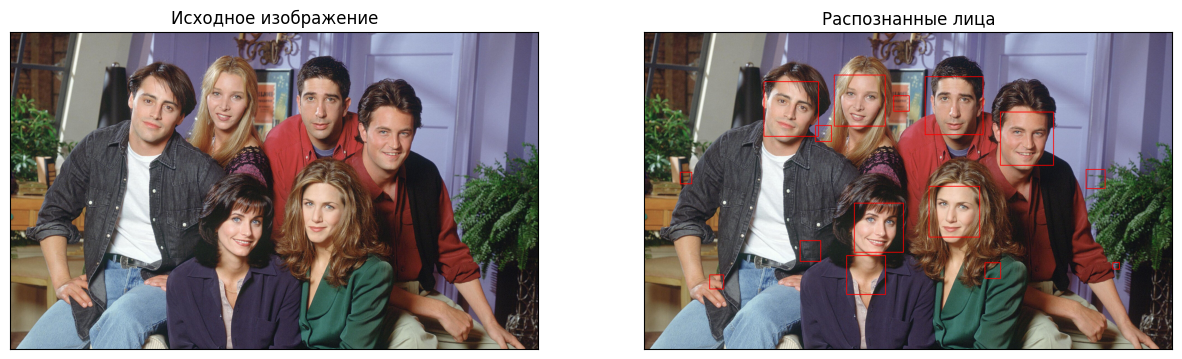

In [1]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./friends.jpg')

# Просто присвоить значение мы не можем, так как произойдет просто присваивание по ссылке
# т.е. обе переменые будут ссылаться на одну и ту же область памяти
# изменение одной переменной привет к изменению другой
img2 = img.copy() # копирование переменной


# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img)

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)




fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

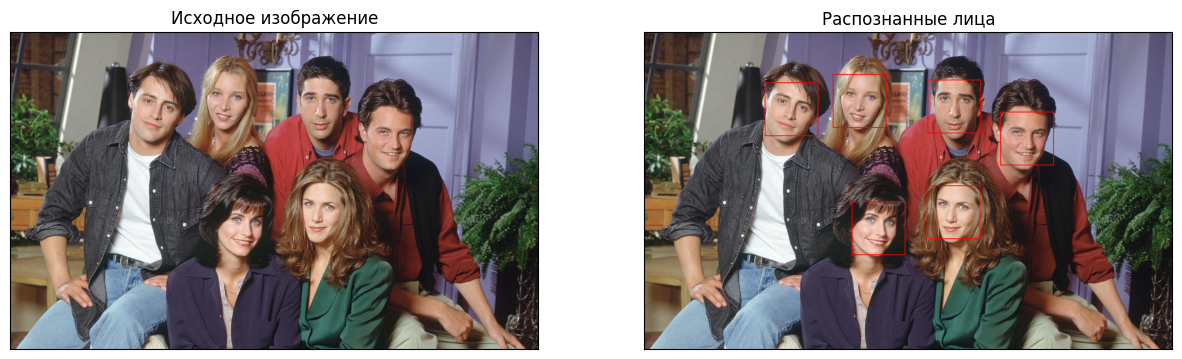

In [2]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./friends.jpg')
img2 = img.copy()

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

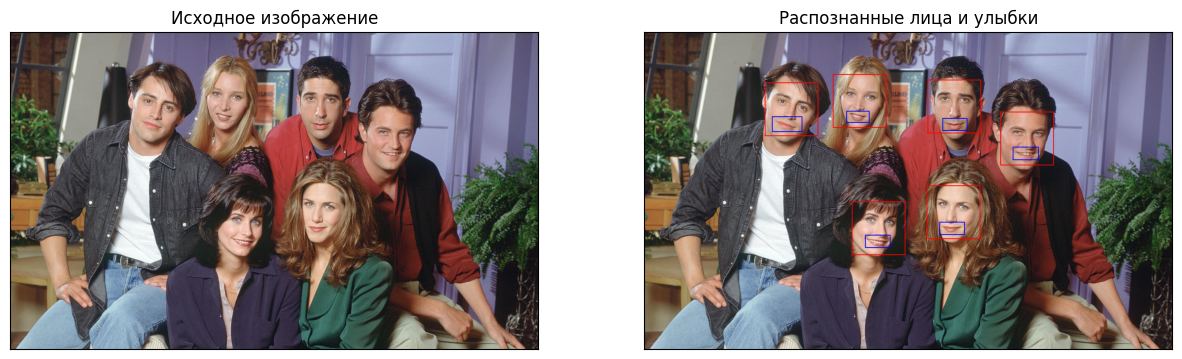

In [3]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

#gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./friends.jpg')
img2 = img.copy()

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


# загрузка каскада Хаара для поиска улыбок
classifier_smile = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_smile.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # выполнение распознавания улыбок
    smiles = classifier_smile.detectMultiScale(face, scaleFactor=1.2, minNeighbors=40, minSize=(20, 20))

    for (sx, sy, sw, sh) in smiles:
            # отрисовка прямоугольника около улыбки
            cv2.rectangle(face, (sx, sy), ((sx + sw), (sy + sh)), (255, 0, 0), 2)



fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и улыбки')

pyplot.show()

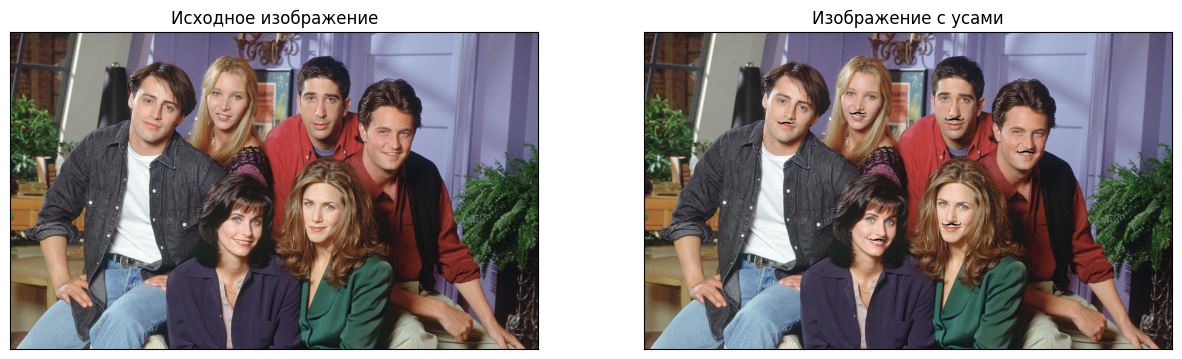

In [4]:
import os
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

#gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)
#gdown.download('https://storage.yandexcloud.net/academy.ai/moustache.png', None, quiet=True)
#gdown.download('https://storage.yandexcloud.net/academy.ai/haarcascade_mcs_mouth.xml', None, quiet=True)


def download_if_missing(url, filename):
    if not os.path.exists(filename):
        gdown.download(url, filename, quiet=True)

download_if_missing('https://storage.yandexcloud.net/academy.ai/friends.jpg', 'friends.jpg')
download_if_missing('https://storage.yandexcloud.net/academy.ai/moustache.png', 'moustache.png')
download_if_missing('https://storage.yandexcloud.net/academy.ai/haarcascade_mcs_mouth.xml', 'haarcascade_mcs_mouth.xml')

# Загрузка изображения
img = cv2.imread('./friends.jpg')
img2 = img.copy()

# Загрузим усы
moustache_mask = cv2.imread('./moustache.png')
h_mask, w_mask = moustache_mask.shape[:2]


# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# загрузка каскада Хаара для поиска рта
classifier_mouth = cv2.CascadeClassifier("./haarcascade_mcs_mouth.xml")


# выполнение распознавания лица
bboxes = classifier_face.detectMultiScale(img, scaleFactor=1.3, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box

    # найденная область с лицом
    face = img2[y:y + height, x:x + width]

    # нас интересует только 1/3 часть лица снизу
    # выполнение распознавания рта (только в нижней части лица)
    mouth_rects = classifier_mouth.detectMultiScale(img2[y+int(2*height/3):y + height, x:x + width], scaleFactor=1.3, minNeighbors=10, minSize=(20, 20))


    if len(mouth_rects) > 0:
        # Берем первый найденный объект, наиболее вероятное расположение рта
        (mx, my, mw, mh) = mouth_rects[0]
        mx -= int(0*mw) # сдвигать усы по оси х не будем
        my = int(2*height/3-5) # восстанавливаем координату относительно лица и немного приподнимаем усы на 5px

        # область рта
        mouth = face[my:my+mh, mx:mx+mw]

        # Маштабируем усы до размера рта
        moustache_mask_small = cv2.resize(moustache_mask, (mw, mh), interpolation=cv2.INTER_AREA)

        # Сделаем наши усы черно-белые и применим инвариантный бинарный порог, как это делали с номерами
        gray_mask = cv2.cvtColor(moustache_mask_small, cv2.COLOR_BGR2GRAY)
        ret, mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)

        # Чтобы инвертировать маску в OpenCV, мы используем функцию cv2.bitwise_not(),
        # которая выполняет побитовую операцию not над отдельными пикселями.
        # https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise#bitwise-not
        mask_inv = cv2.bitwise_not(mask)

        # побитовое AND для двух изображений, результирующая - пиксели присутствующие на обоих изображениях
        masked_mouth = cv2.bitwise_and(moustache_mask_small, moustache_mask_small, mask=mask)
        #  https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise#bitwise-and
        masked_face = cv2.bitwise_and(mouth, mouth, mask=mask_inv)

        # Объединяем рот и усы
        face[my:my+mh, mx:mx+mw] = cv2.add(masked_mouth, masked_face)



fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Изображение с усами')

pyplot.show()

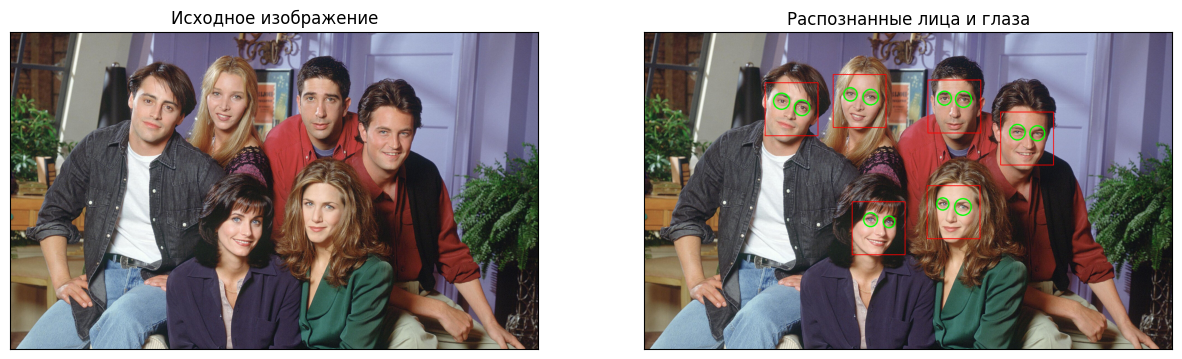

In [5]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline


#gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./friends.jpg')
img2 = img.copy()

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # рисуем круг
        cv2.circle(face, center, radius, color, thickness)




fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()